--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | Gözde Özden

# Replication of Lee, D. S., Moretti, E., & Butler, M. J. (2004): Do Voters Affect or Elect Policies? Evidence from the US House.
---

This notebook contains my replication of the results from the following paper:

> [Lee, D. S., Moretti, E., & Butler, M. J. (2004). Do Voters Affect or Elect Policies? Evidence from the US House. The Quarterly Journal of Economics, 119(3), 807-859](https://academic.oup.com/qje/article-abstract/119/3/807/1938834?redirectedFrom=fulltext).

##### Downloading and viewing this notebook:


* The best way to view this notebook is to visit repository which is located in from [GitHub](https://github.com/OpenSourceEconomics/ose-data-science-course-project-ozdengo). In the case of Latex rendering issue, the best way to view notebook properly is by downloading it. Also, it can be viewed by MyBinder or NBViewer. If some images are missing, please visit [files folder](https://github.com/OpenSourceEconomics/ose-data-science-course-project-ozdengo/tree/master/files).



##### About this notebook:

* I have three main purposes: 

    * First, to understand and investigate concepts and theories of the close election design using the paper of Lee et al.(2004).
    * To replicate selected key parts and results of Lee et al.(2004). 
    * To extend the results by checking validity of the design and bandwidth sensivity across different polynomial of order.

* I try to follow the original structure of the paper; however, the numbers of some titles may differ due to the fact that I do not replicate all parts of the paper.

 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li>
        <li><span><a href="#2.-Identification" data-toc-modified-id="2.-Identification-2">2. Identification</a></span></li>
        <li><span><a href="#3.-Theoretical-Framework" data-toc-modified-id="3.-Theoretical-Framework-3">3. Theoretical Framework</a></span></li>
        <li><span><a href="#4.-Estimating-Framework" data-toc-modified-id="4.-Estimating-Framework-4">4. Estimating Framework</a></span></li>
        <li><span><a href="#5.-Replication-of-Lee,-D.-S.,-Moretti,-E.,-&amp;-Butler,-M.-J.-(2004)" data-toc-modified-id="5.-Replication-of-Lee,-D.-S.,-Moretti,-E.,-&amp;-Butler,-M.-J.-(2004)-5">5. Replication of Lee, D. S., Moretti, E., &amp; Butler, M. J. (2004)</a></span>
            <ul class="toc-item">
                <li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li>
                <li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results-5.2">5.2. Results</a></span>
                    <ul class="toc-item">
                        <li><span><a href="#5.2.1.-Main-Empirical-Results" data-toc-modified-id="5.2.1.-Main-Empirical-Results-5.2.1">5.2.1. Main Empirical Results</a></span></li>
                        <li><span><a href="#5.2.2.-Test-for-Quasi-Random-Assignment" data-toc-modified-id="5.2.2.-Test-for-Quasi-Random-Assignment-5.2.4">5.2.2. Test for Quasi-Random Assignment</a></span></li>
                        <li><span><a href="#5.2.3.-Sensitivity-to-Alternative-Measures-of-Voting-Records" data-toc-modified-id="5.2.3.-Sensitivity-to-Alternative-Measures-of-Voting-Records-5.2.5">5.2.3. Sensitivity to Alternative Measures of Voting Records</a></span></li>
                        <li><span><a href="#5.2.4.-Heterogeneity" data-toc-modified-id="5.2.4.-Heterogeneity-5.2.6">5.2.4. Heterogeneity</a></span></li></ul></li></ul></li>
                        <li><span><a href="#6.-Extensions" data-toc-modified-id="6.-Extensions-6">6. Extensions</a></span>
    <ul class="toc-item">
        <li><span><a href="#6.1.-Check-for-the-Validity-of-the-Design" data-toc-modified-id="6.1.-Check-for-the-Validity-of-the-Design-6.1">6.1.  Check for the Validity of the Design</a></span>
        <li><span><a href="#6.2.-Bandwidth-Sensitivity-and-Polynomial-Models" data-toc-modified-id="6.2.-Bandwidth-Sensitivity-and-Polynomial-Models-6.2">6.2. Bandwidth Sensitivity and Polynomial Models</a></span></li></ul></li>
                        <li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7. Conclusion</a></span></li><li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pyreadstat as pread
import pandas.io.formats.style
import statsmodels as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from IPython.display import HTML, display
from stargazer.stargazer import Stargazer
import warnings
warnings.filterwarnings('ignore')


In [2]:
from auxiliary.auxiliary_plots import *
from auxiliary.auxiliary_predictions import *
from auxiliary.auxiliary_tables import *

---
# 1. Introduction 
---
The goal of Lee et al.(2004) is to examine how voters affect policy. The power of voters to affect or elect policies is depending on candidates' desire to make credible promises to execute moderate policies. There are two main theories about how political competition affects policies. The first theory, the converge theory, argues that political competition enables candidates to be more moderate about their policies. The most well-known component of this is the Median Voter Theorem. Politicians who only care about winning choose the same policy in extreme cases as "full policy convergence" (Downs, 1957). When opposing candidates are concerned not only about winning the election, but also about the policies that are adopted, a similar result emerges. Although opposing candidates may not have identical policies, electoral competition will force them to pursue policies that are more moderate than their primary goals as "partial policy convergence" (Wittman,1938;Calvert,1985). In this theory, voters "affect" policies by promoting the candidates to modarate their policies toward median voter.

Downs' theorem may be compromised in the case that main concerns of the politicians are policies and there is no chance for binding about policies. The second theory, the divergence theory, indicates that the elected politicians cannot be credible about the policy promises they make when they are candidates (Alesina, 1988). They simply adopt their fixed policies once they got the office. In this theory, voters merely "elect" policies rather than affecting policies as in converge theory. 

On the one side, politicians moderate their policies when electoral promises are credible as in "partial policy converge". On the other side, elections are only a means of determining whether candidate's fixed policy will be adopted when politicans are not credible about their policy promises. The real question is that which of these opposite perspectives is more empirically valid. The paper of Lee et al. evaluates the relative importance of these different perspectives by regression discontiunity design and roll-call voting records data from the US House between 1946 and 1995.

This paper first discusses the identification strategy, then establishes theoretical and emprical frameworks. The results. The fifth parth of this paper presents the replication results of original paper. The fourth part contains my extensions about banwidth sensivity and polynomial order. The sixth part of this paper concludes.



---
# 2. Identification
--- 
Lee, Moretti and Butler indicates that the best way to understand the role of voters is to compare most preferred policies ("bliss points") of candidates with the policies they will actually adopt. More modarate voting records than candidates' bliss points show that voting behavior influences candidates' policy decisions. If the bliss points and voting records are same, the role of voters is electing the policies. However, because of the fact that there are no accurate assessments of candidates' bliss points, such an analysis is impossible.

Therefore, they adapted very clever structure. First of all, they focus on Democrat wins to examine whether voter affect or elect policies. Because it is important to eliminate any difficulties that occurs due to differences in ideological preferences of voters and politicians, demographic structures, resources available for candidates; they aim to randomize the Democrat win. To do so, they focus on wins with very narrow margin. For instance, they begin their analysis with less than a 2 percent vote share. Therefore, they try to create a virtual random environment in which it is ambigious who would get the office. It is obvious that the winner of 1992 election will have relatively stronger position in 1994 election. However, the main point of this structure is that creating randomized environment for 1992 elections provides randomized environment in which party's candidate has greater electoral strength for 1994 election. They try to use this difference in electoral strength to understand the effect of fully divergence and partially convergence. 

They compare the voting scores of the winners in 1995-1996 elections where the Democrats got the office in 1994 elections and the voting scores of the winners where the Republicans got the office. This effect called as "overal effect" and consists of two factors. 

The first factor is the effect of voting scores in 1995-1996 where the incumbent is Democrat in 1994 elections. Since the winner party in 1994 election will have greater electoral strength in the next election and Democrats are more liberal, it is expected that the voting scores would be more liberal in 1995-1996 election. Therefore, first factor indicates how policies elected by voters. It can be computed by analyzing the probability that Democrat will be winner where the office is gotten by Democrats and the difference between the votes of Democrats and Republicans.

The second factor shows that what candidates reaction would be to an exogenous shock of winning probability in 1994 election. In the case that politicians need to follow their promises, the votes of a Democrat candidate running against a Republican who is winner in 1994 election are expected to be less liberal than a Democrat incumbent. Therefore, this effect indicates how voters "affect" policies. 

It is essential to compute relative magnitudes of these two factors to understand the relative importance of these effects: full policy divergence and partial policy convergence. This computation is possible thanks to randomization of Democrat wins.




<table><tr>
    <td><img src="files/causalgraph1.PNG" width="500" height="500"></td>
    <td><img src="files/causalgraph2.PNG" width="510" height="550"></td>
</tr></table>
    




---
# 3. Theoretical Framework
---
The underlying framework utilized for the analysis is a framework developed by Alesina (2008). Consider that there are two parties: D (Democrats) and R (Republicans). Assume that the policy space is unidimensional and policy preferences of Democrats and Republicans are represented by quadratic loss functions, respectively: $u(l) = -(1/2)(l-c)^2$ and $v(l) = -(1/2)l^2$ where $l$ is policy variable and $c(>0)$ bliss points.

The expected policy preferences of D and R before election are, respectively, $x^e$ and $y^e$ and rational expectations denoted by $x = x^e$ and $y=y^e$. The expected probability of win for a candidate is $P(x^e,y^e)$. 

When $x^e>y^e$, the best strategy to get more votes is to moderate policy preferences such that:

\begin{equation}
    \frac{\partial P}{\partial x^e} > 0 , \frac{\partial P}{\partial y^e} > 0
\end{equation}

This game repeats for every period where period $t$ includes the election and the subsequent Congressional session, and same for next periods. For example, period $t = 1992$ consists of 1992 election and roll-call votes ($RC_{t}$) for Congressional session in 1993-1994. 

There are 3 Nash equilibria for the solution of this game:

 1. **Full Policy Convergence**: $x^* = y^* = \lambda^*c$
     * The key result: 
      \begin{equation}
         \frac{\partial P}{\partial x^e} = \frac{\partial P}{\partial y^e} = (\frac{\partial \lambda}{\partial P^*})c > 0
      \end{equation}<br>
     * An increase in $P^*$ means that an exogenous increase in popularity of Democrats (like a helicopter drop of Democrats) and an increase in bargaining power of Democrats. Since the candidates change their policy preferences and adopt the same policies as $\frac{\partial x^*}{\partial P^*} > 0$, voters affect policies.
     
     
 2. **Partial Policy Convergence**: $0≤y^*≤x^*≤c$ 
     * The key result:
     \begin{equation}
         \frac{\partial x^*}{\partial P^*},\frac{\partial y^*}{\partial P^*} > 0  
     \end{equation}<br>
     * Voters can effect the policy promises of candidates although they cannot force them to adopt the same policies.
    
    
 3. **Full Policy Divergence**: $x^*=c, y^*=0$
     * The key result: 
     \begin{equation}
         \frac{\partial x^*}{\partial P^*}  , \frac{\partial y^*}{\partial P^*} = 0  
     \end{equation} <br>
     * Exogenous increase or decrease in popularity does not affect the equilibrium. Therefore, voters can merely elect the policies.
     
     
     
There are two main assumption about voters that they are forward-looking and rational. In real life, candidates do not need to be credible about their policy promises. But in this game, it is assumed that candidates are credible due to prevent any lose on their reputation (Alesina, 1988).
 

     
 


---
# 4. Estimating Framework
---
The record of the roll-call voting outcomes for the candidates is computed as:

\begin{equation}
RC_{t} = (1 - D_{t})y_{t} + D_{t}x_{t}
\end{equation}

where $D_{t}$ represents whether Democrat wins the election in period t. Note that, the only observable policy is the winner's policy. 

This equilibrium is converted into regression equilibrium as :

\begin{equation}
RC_{t} = constant + π_{0}P_{t}^* + π_{1}D_{t} + \epsilon_{t}
\end{equation}


\begin{equation}
RC_{t+1} = constant + π_{0}P_{t+1}^* + π_{1}D_{t+1} + \epsilon_{t+1}
\end{equation}

where $P^*$ indicates the popularity of D, and $\epsilon$ indicates the heterogeneity in bliss points across districts. If $π > 0$, then voters can affect policies as partial policy convergence. If $π = 0$, then voters merely effect policies as full policy divergence. 

This regression equation cannot be computed directly due to the fact that $P^*$ is unobservable. However, we can let $D_{t}$ to be independent from $P_{t}^*$ and $\epsilon_{t}^*$ by randomizing the $D_{t}$. It follows that:


\begin{equation} \label{eq1}
\begin{split}
\underbrace{E[RC_{t+1} | D_{t} = 1] - E[RC_{t+1} | D_{t} = 0]}_\text{observable} & = \underbrace{π_{0}[P_{t+1}^*D - P_{t+1}^*R]}_\text{"affect" component (unobservable)} \\ 
& + \underbrace{π_{1}[P_{t+1}^D - P_{t+1}^R]}_\text{"elect" component (observable)} \\ 
& =  \underbrace{\gamma}_\text{total effect (observable)}  
\end{split}
\end{equation}

where superscripts of D and R indicate the winner.

$\gamma$ indicates the overall effect of Democrat win in t on $RC_{t+1}$ and it is sum of elect and affect components. It can be computed by the simple difference in $RC_{t+1}$ between the regions where D and R got the office in $t$.

\begin{equation}
E[RC_{t} | D_{t} = 1] - E[RC_{t} | D_{t} = 0] = π_1
\end{equation}

Basically, $π_1$ can be computed by the difference in $RC_t$ between the regions won by D and R. 

\begin{equation}
E[D_{t+1} | D_{t} = 1] - E[D_{t+1} | D_{t} = 0] = P_{t+1}^D - P_{t+1}^R
\end{equation}

The rest of the elect component can be computed by the difference in fraction of districts won by D in $t+1$.

Since the affect component cannot be estimated directly, it can be estimated by substracting the elect component from the total effect. The essential point is the randomization of $D_t$. Without it, there would be bias for $\gamma$ and $π_1$ and it will show that how policiticans can have more liberal bliss points in the districts where Democrats won. 







---
# 5. Replication of Lee, D. S., Moretti, E., & Butler, M. J. (2004)
---

## 5.1. Data & Descriptive Statistics


The result of Lee et al. based on the data from U.S. House of Representatives election results from 1946 to 1996. There are several ways to measure the voting records of Representatives. They use the data of Americans for Democratic Action (ADA) provided by the liberal political organization for voting records since it is commonly used index in the literature. Twenty high-profile roll-call votes are selected by ADA for each congress, and an index between 0 and 100 is created for each Representative. Higher ADA score means that the voting record of Representative is more liberal. 
They also calculate the Democrat share of votes by dividing the number of Democrat votes to the number of votes for both the Democrat and the Republican.

---
<span style="color:orange">**NOTE**:</span> The original data used in this paper by authors are available at [here](https://eml.berkeley.edu/~moretti/papers.html).

---

#### Table 1- Summary statistics

In [3]:
pd.set_option("display.precision",2)
data = pread.read_dta("data/enricoall2.dta")[0]
data[["realada","demvoteshare","lagdemvoteshare"]].describe()


,realada,demvoteshare,lagdemvoteshare
count,18842.00,20238.00,18972.00
mean,40.74,0.58,0.58
std,32.69,0.23,0.23
min,-27.92,0.00,0.00
25%,10.22,0.41,0.41
50%,36.58,0.55,0.55
75%,71.63,0.71,0.72
max,128.85,1.00,1.00


##  5.2. Results

### 5.2.1. Main Empirical Results

It is important to examine the effect of exogenous change in roll-call votes to understand the difference between the effects of full policy divergence and partial policy divergence.
The total effect ( $\gamma$ ) contains of two factors. These factors are the elect component ( $π_1[P^{D}_{t+1} - P^{R}_{t+1}]$ ) and the effect component ( $π_0[P^{*D}_{t+1} - P^{*R}_{t+1}]$ ).

The elect component is expected to be higher than the effect component and candidates do not make big adjusments in their policy promises if voters merely elect the policies. The affect component will be higher than the elect component and candidates adjust their bliss points to increase their winning probability if voters affect policies.

The first graph shows the ADA scores at $t+1$ against the Democrat vote share at $t$. Each point on the graph indicates the average ADA score at $t+1$ with 0.01 intervals of the vote share at $t$. The verdical line shows the cutoff, 50% of the vote share. The right side of the line indicates the Democrat win districts while the left side is for the Republican win districts. The continuous line is the predicted ADA score at $t+1$. It is calculated by a regression that contains fourth-order polynomial in vote share and a dummy for the vote share of above the cutoff and an interaction between dummy and polnomial component. The dotted lines shows the 95% confidence interval.

There is an obvious discontinuous jump, about twenty points, in ADA score at the cutoff line on the graph below. This discontinuity indicates the total effect ($\gamma$). It is expected to that the probability of Democrat win at $t+1$ is higher if the winner is Democrat at $t$ in the same district. Therefore, the district that run by a Democrat at $t$ would be more liberal at $t+1$ due to advantage of winning. This first effect called as "elect" component as I discussed above. 

The second component that affects $\gamma$ is the affect component. In order to understand this component, we should compare a Democrat in a district where a Republican held the seat (left side of the graph) and other Democrat who is incumbent in her district (right side of the graph). In this case, a democrat who is challenging a Republican should adjust her policies more than an incumbent Democrat. This is another affect to that the district would be more liberal, where a Democrat held the seat.


#### Figure 1 - Total Effect of Initial Win on Future ADA Scores: $\gamma$

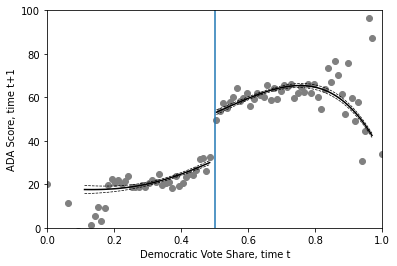

In [4]:
ada_score(data, lag=True) 

The real question is that which component dominates another altough e found the $\gamma$. However; due to the fact that it is impossible to compute the affect component, we should analyze the elect component first in order to compare both effects. To analyze the elect component, Lee et al. compute $π_1$, the expected difference in votes between two parties, and [ $P^{D}_{t+1} - P^{R}_{t+1}$ ], the advantage of winning party, separately. Then, we can substract the elect component from $\gamma$ to analyze the affect component. 

In Figure 2a, it is a jump at the cutoff about 45 points. In order to understand this jump, we should compare the disctricts where a Democrat barely won and lost. Therefore, we can understand voting of Democrats in district where barely won by a Republican thanks to average voting records of Democrats who barely won the election. 

#### Figure 2a - Effect of Party Affiliation: $π_1$

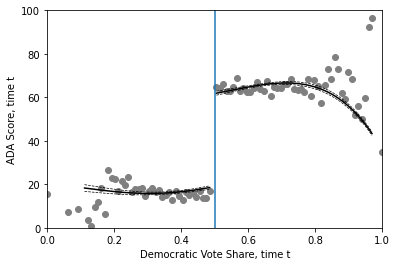

In [5]:
ada_score(data, lag=False)

The figure 2b indicates that the probability of winning for a Democrat is higher at $t+1$ in disctricts where a Democrat barely won at $t$. In this case, the jump is about 5 point.

#### Figure 2b - Effect of Initial Win on Winning Next Election: ( $P^{D}_{t+1} - P^{R}_{t+1}$ )

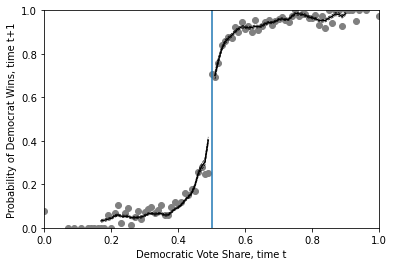

In [6]:
probability_democrat(data)

For all graphs above, it is important to take account that the RD design is valid and the the winner at $t$ is generated by a random assignment. 

Figure 1 shows that the total effect $\gamma$ is about twenty ADA points. Figure 2a indicates that $π_1$ is about 45 points and [ $P^{D}_{t+1} - P^{R}_{t+1}$ ] is about 0.5 points. Therefore the elect component, $π_1[ P^{D}_{t+1} - P^{R}_{t+1} ]$, is about $ 45 x 0.5 = 22.5 $. The difference between the total effect and elect component is $ 20 - 22.5 = - 2.5$. We understand that the exogenous shock in ADA score is not determined by the change in policy promises of candidates to increase her the probability of winning. This effect only works by changing the relative probability that a party that will get the office. Therefore, these graphs show that voters elect policies instead of affecting them. 

Table 2 is created to understand the results deeply. Column 1 corresponds to the jump in Figure 1. It determined by the difference in average ADA scores at $t+1$ between the districts where Democrat vote share between 50% and 52% and the districts where Democrat vote share between 48% and 50%. The result of this difference is $21.4$.

Column 2 corresponds to the jump in Figure 2a, which is equal to $π_1$. It shows the difference in ADA score at $t$ between the disricts where Democrat vote share between 50% and 52% and the districts where Democrat vote share between 48% and 50%. The estimated result of difference is $47.7$.

Column 3 corresponds to [ $P^{D}_{t+1} - P^{R}_{t+1}$ ] which is graphed in Figure 2b. The estimated result of this jump is $0.46$. It means that in a district where the winner was Democrat at time $t$, the probability of being winner for a Democrat. is $0.46$ higher. 

In column 4, to compute the elect component ( $π_1[P^{D}_{t+1} - P^{R}_{t+1}]$ ), I multiply column 2 and column 3 as Lee et al.
The result is $22.08$ and it is similar with the result in column 1. Therefore, it is possible to conclude that the affect component is small than the elect component. 

#### Table 2 - Results Basen on ADA Scores - Close Elections Sample

In [7]:
table_vscore(data, 'realada', bandwidth = True)

#### Extension | Table - Results Basen on ADA Scores - Full Elections Sample

In the case that we estimate the global regression, the coefficients are larger than close election as in extension table below. The distance at $c_0$ spreads widely due to the fact that strong outliers exist in the data. Therefore, we have to restrict data as above to eliminate these outliers.

In [8]:
table_vscore(data, 'realada', bandwidth = False)

### 5.2.2. Test for Quasi-Random Assignment

It is crucial to remember that the randomization of the winner is key point for all estimation. Without it, estimation would be biased. The closer elections means that the difference in features of Democrats and Republicans become smaller. 

For instance, we can say that the probability of winning for a Democrat is higher than a Republican in South districts based on the comparison geographical locations. However, if we restrict the elections around a cutoff, this difference decreases. 

Differences occur due to characteristics is graphed in Figure 3 and 4. Real income, percentage of high school degree, percentage of black population, percentage of eligible for voting are analyzed to compare the differences at the 50% threshold. It is found that these differences are statistically insignificant and small. 

#### Figure 3 - Similarity of Constituents’ Characteristics in Bare Democrat and Republican Districts—Part 1

In [9]:
variables_1 = ["realincome", "pctblack", "pcthighschl", "pcteligible"]
variables_2 = ["votingpop", "North", "South", "West"]
all_variables = [variables_1, variables_2]

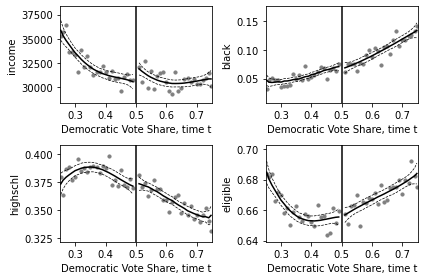

In [10]:
subplot2_2(variables_1)

#### Figure 4 - Similarity of Constituents’ Characteristics in Bare Democrat and Republican Districts—Part 2

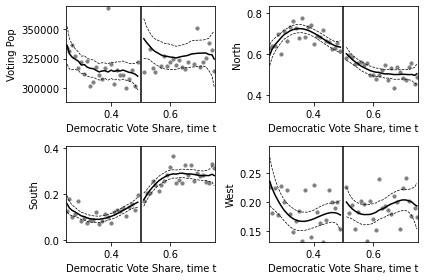

In [11]:
subplot2_2(variables_2)

In Table 3, more characteristics used in order to understand the difference between Democrat and Republican. The results for entire sample can be seen in Column 1. Column 2 to Column 5, there are results for Democrat vote share with different restriction intervals In column 6, fourth order polynomial Democrat vote share is illustrated. It can be concluded that any significant difference is not observed around 50% threshold. Also, Figure 5 proves the continuity visually as there is no significant gap (3.8).

A valid RD design is proved thanks to these results. Therefore, we can safely say that the winning is randomized in close election design. 

#### Table 3 - Difference in the District Characteristics between Democrat and Republican 

In [12]:
pd.set_option('display.float_format','{:.0f}'.format)
coef, err = table_char(data)
coef['type'] = ['coefficient']*len(coef)
err['type'] = ['err']*len(err)
table_2 = coef.append(err)
table_2 = table_2.groupby([table_2.index, 'type']).mean()
table_2.columns = ['All', '+/- 25', '+/- 10', '+/- 5','+/- 2','Polynomial']
table_2.style.set_precision(2)

#### Figure 5 - Specification Test: Similarity of Historical Voting Patterns between Bare Democrat and Republican Districts

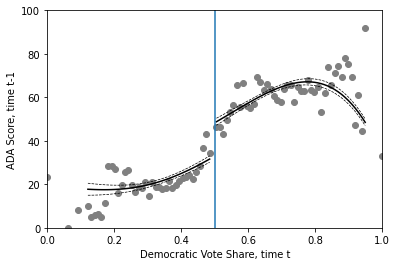

In [13]:
lagada_score(df)

### 5.2.3. Sensitivity to Alternative Measures of Voting Records

Lee, Moretti and Butler used the ADA voting score for all estimations. They try to find an answer to the question of whether there would be any change in results if other voting scores are used. 

In Table 4, two different voting scores are analyzed to understand the answer of this question. The results based on DW-Nominate scores that created by McCarty, Poole and Rosenthal are illustrated in Table 4a. In table 4b, the results for the percent of the roll-call votes like Democrat leadership.

If DW-Nominate is used instead of ADA score, $\gamma$ is $-0.26$. The elect component, ( $π_1[P^{D}_{t+1} - P^{R}_{t+1}]$ ), is computed as $-0.27$ which is extremely close with $\gamma$. These estimations are negative due to the fact that DW-Nominate measures the voting scores more conservative. 
If "percent voted like Democrat leadership" is used, $\gamma$ is computed as $0.14$. It is almost same with the elect component,( $π_1[P^{D}_{t+1} - P^{R}_{t+1}]$ ), which is $0.14$. Also, I show the graphical illustration of these results in Figure 6a and Figure 6b.

These results are compatible with the results in Table 2. Therefore, we can conclude that these results are independent from which index is chosen for voting score. With these alternative voting score measures, we can again argue that elect component dominates affect component.



In [14]:
data2 = pread.read_dta("data/enricoall4.dta")[0]

#### Table 4a - Results Based on Nominate Scores - Close Election Sample

In [15]:
table_vscore(data2, 'dwnom1', bandwidth = True)

#### Table 4b - Results Based on Percent Voted Like Democrat Leadership - Close Election Sample

In [16]:
table_vscore(data2, 'eq_Dlead', bandwidth = True)

#### Figure 6a - Nominate Scores, by Democrat Vote Share

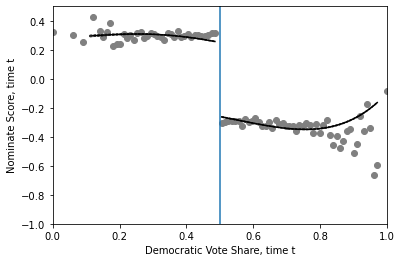

In [17]:
dwscore(data2, lag=False)

#### Figure 6b - Percent Voted with Democrat Leader, by Democrat Vote Share

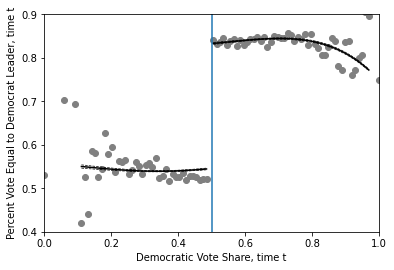

In [18]:
Dlead(data2, lag=False)

### 5.2.4. Heterogeneity

The bliss points of candidates can vary over time and across districts. This called as heterogeneity. We assume that candidates' bliss points do not change across districts and over time. However; this assumption can be refuted if there are any differences in the gap policy promises between D and R across districts or over time. 

The results for heterogeneity over time can be found at Table 5. The estimated discontinuity is smaller in 1970s and larger in 1990s as seen in Column 1. Column 3 shows that the advantage of winning increases over time. It is important to highlight that the difference between efect component and affect component are stable over time. 

#### Table 5 - Results Based on ADA Scores, by Decade - Close Election Sample

In [19]:
year_list = [[1946, 1958], [1960, 1968], [1970, 1978], [1980, 1996]]
all_year = [df.year.min(), df.year.max()]
table_multiyears(data, years = year_list)

$ADA_{t+1}$ $ADA_t$ $DEM_{t+1}$
                                           
1946-1958         14.58   41.91        0.42
                 (3.19)  (2.29)      (0.05)
1960-1968         22.79    49.7        0.47
                 (3.73)  (2.47)      (0.05)
1970-1978         11.55   46.63        0.41
                 (4.72)  (3.36)      (0.07)
1980-1996         44.86    54.9        0.66
                 (3.52)  (2.71)      (0.05)

---
# 6. Extensions
---


## 6.1.  Check for the Validity of the Design

It is important to check the validity of the RD design by using several approaches. Therefore, we can understand that the possibility of manipulations on running variable. There are 3 main techniques to check validity of the design. Lee et al. conduct two of them : falsification test based on previous ADA scores and continiuty covariates. The third way is to use density test, which I investigate the distribution of Democrat Vote share. McCrary (2008) argues that a jump in the density or distribution means that the running variable manipulable which invalidates the design.

In order to prove the validity of the design, there should be no significant change in the density of the frequency at the threshold. As it can be seen in Figure 7, there was no manipulation on Democrat vote share.


#### Figure 7 - Distribution of Democrat Vote Share

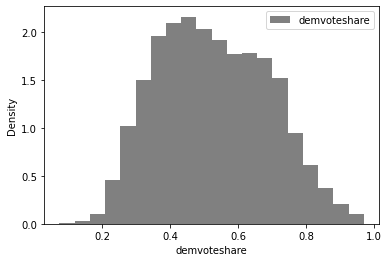

In [20]:
plot_hist(data, 'demvoteshare', bins = 20)

## 6.2. Bandwidth Sensitivity and Polynomial Models

Lee et. al use parametric methods in their research although non-parametric methods are usually preferred in the literature. I extend my analysis in order to ensure that results are non-sensitive to the specification choices. Table 6 represents the estimations for $\gamma$ using different bandwidth size and polynomial of orders. Increase in the bandwidth size due to decrease the bias, causes necessity of higher polynomial of orders. The scope of bias decreases with smaller bandwidth size. Therefore, higher polynomial of orders causes overfitting with smaller bandwidth size. Table 7 represents the same analysis for $π_1$. Columns and rows represent respectively bandwidth and polynomial orders.

#### Table 6 - Total Effect Estimation ($\gamma$)  by Different Bandwidth and Polynomial Order

In [21]:
bw_list = [0, 0.375, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02]
table_df = table_poly_and_bw(df,"score","lagdemocrat",1,bw_list)
for ord in range(2,5):
    a = table_poly_and_bw(df,"score","lagdemocrat",ord,bw_list)
    table_df = table_df.append(a)
table_df

0   0.375    0.25     0.2    0.15     0.1    0.05    0.02
one       31.47   37.07   36.16    34.9   33.31    30.8    24.8   21.41
         (0.44)  (0.44)  (0.47)  (0.51)  (0.58)  (0.72)  (1.03)  (1.72)
two       15.74   18.53   18.08   17.45   16.66    15.4    12.4   10.71
         (0.22)  (0.22)  (0.23)  (0.25)  (0.29)  (0.36)  (0.52)  (0.86)
three     10.49   12.36   12.05   11.63    11.1   10.27    8.27    7.14
         (0.15)  (0.15)  (0.16)  (0.17)  (0.19)  (0.24)  (0.34)  (0.57)
four       7.87    9.27    9.04    8.73    8.33     7.7     6.2    5.35
         (0.11)  (0.11)  (0.12)  (0.13)  (0.14)  (0.18)  (0.26)  (0.43)

#### Table 7 - Party Affiliation Effect Estimation ($π_1$)  by Different Bandwidth and Polynomial Order

In [22]:
table_df = table_poly_and_bw(df,"score","democrat",1,bw_list)
for ord in range(2,5):
    a = table_poly_and_bw(df,"score","democrat",ord,bw_list)
    table_df = table_df.append(a)
table_df

0   0.375    0.25     0.2    0.15     0.1    0.05    0.02
one       42.59   48.82   48.91   49.04   49.37   49.55   49.25   48.74
         (0.37)  (0.36)  (0.36)  (0.39)  (0.43)  (0.51)  (0.71)  (1.11)
two       21.29   24.41   24.45   24.52   24.68   24.78   24.63   24.37
         (0.19)  (0.18)  (0.18)  (0.19)  (0.22)  (0.26)  (0.36)  (0.56)
three      14.2   16.27    16.3   16.35   16.46   16.52   16.42   16.25
         (0.12)  (0.12)  (0.12)  (0.13)  (0.14)  (0.17)  (0.24)  (0.37)
four      10.65    12.2   12.23   12.26   12.34   12.39   12.31   12.18
         (0.09)  (0.09)  (0.09)   (0.1)  (0.11)  (0.13)  (0.18)  (0.28)

---
# 7. Conclusion
---



In conclusion, the paper of Lee, Moretti an Butler (2004) is replicated in this paper. They find that the candidates do not shift their policy promises to the median voter due to incumbency effect. This supports the view of full policy divergence. They argued that voters merely elect policies rather than affect policies. The findings in this replication project are compatible with the results in original paper. Additionaly, I discussed the identification strategy of the paper and analyzed the results with using different bandwidth size and order polynomial. The results are same with different approaches. 

The finding about full policy divergence do not represent overall degree of representativeness which can be defined as the degree of represented policies of supporters by politician. Neither Lee et al. nor I cannot find a suitable solution to analyze the most preferred policy choice of median voters.  These results can be represent the representativeness of median voter within the party. Instead of this, we try to analyze the deviations on candidates' bliss points due to competition.

Full policy divergence based on very strong assumptions and definitions that candidates do not change their policy promises due to exogenous shock in vote shares. The analysis conducted in this paper is compatible with this view. At least, we can conclude that candidates do not behave credible about their policy promises. However, it is beneficial to explore how voters can affect which candidates policy promises in which way.

---
# 8. References
---

* **Alesina, Alberto,** “Credibility and Policy Convergence in a Two-Party System with Rational Voters,” American Economic Review, LXXVIII (1988), 796–805.


* **Alesina, Alberto, and Stephen E. Spear,** “An Overlapping Generations Model of Electoral Competition,” Journal of Public Economics, XXXVII (1988), 359–379.


* **Downs, Anthony,** An Economic Theory of Democracy (New York, NY: Harper and Row, 1957).


* **Lee, D. S., & Lemieux, T. (2010)**. Regression Discontinuity Designs in Economics. *Journal of Economic Literature*, 48(2), 281-355.


* **McCrary, J. (2008)**. Manipulation of the Running Variable in the Regression Discontinuity Design: A Design Test. *Journal of Econometrics*, 142: 698–714. 


* **Wittman, Donald,** “Candidate Motivation: A Synthesis of Alternative Theories,” American Political Science Review, LXXVII (1983), 142–157.



-------
Notebook by Gözde Özden 

---